In [1]:
import mlflow
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import title
from ultralytics import YOLO, settings
from roboflow import Roboflow
import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rf = Roboflow(api_key="dh1IQQWaRMJr2hLveWqL")
project = rf.workspace("daniels-magonis-0pjzx").project("valorant-9ufcp")
version = project.version(3)
dataset = version.download("yolov11", "./datasets/")
settings.update({'mlflow': True})

loading Roboflow workspace...
loading Roboflow project...


In [3]:
ds = datasets.load_dataset("keremberke/valorant-object-detection", "full")
ds = ds['train'].to_pandas()
objects_df = pd.json_normalize(ds.objects).explode(['id', 'area', 'bbox', 'category'], ignore_index=True)
objects_df.rename(columns={'id': 'object_id'}, inplace=True)
ds = ds.drop(columns='objects').join(objects_df)

In [18]:
ds

,image_id,image,width,height,object_id,area,bbox,category
0,3947,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,4083,3718,"[147.0, 201.0, 33.5, 111.0]",1
1,4451,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,4606,1113,"[174.0, 149.0, 21.0, 53.0]",2
2,211,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,216,259,"[206.0, 220.0, 8.5, 30.5]",3
3,6012,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,6228,2277,"[162.0, 196.0, 23.0, 99.0]",1
4,1902,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,1971,335,"[207.0, 138.0, 11.0, 30.5]",3
...,...,...,...,...,...,...,...,...
6922,1033,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,2002,177,"[178.0, 218.0, 6.0, 29.5]",3
6923,2197,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,4457,9150,"[246.0, 159.0, 50.0, 183.0]",3
6924,802,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,5140,1189,"[124.0, 190.0, 19.5, 61.0]",3
6925,680,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,416,416,4270,146,"[214.0, 211.0, 7.5, 19.5]",1


<AxesSubplot: xlabel='category', ylabel='Count'>

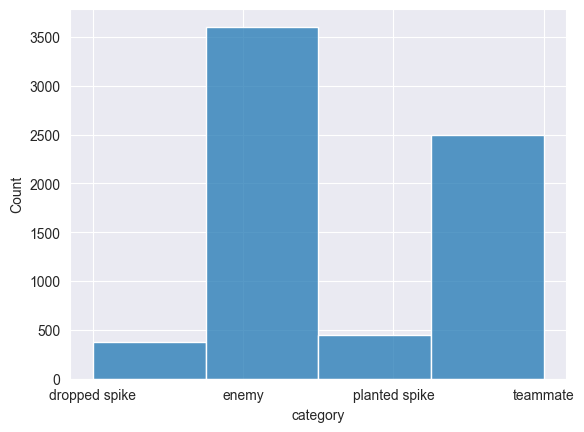

In [8]:
ds = ds.dropna()
plt.xticks(range(4), ['dropped spike', 'enemy', 'planted spike', 'teammate'])
sns.histplot(ds['category'], bins=4)

In [9]:
ds.shape

(6926, 8)

<AxesSubplot: xlabel='area', ylabel='Count'>

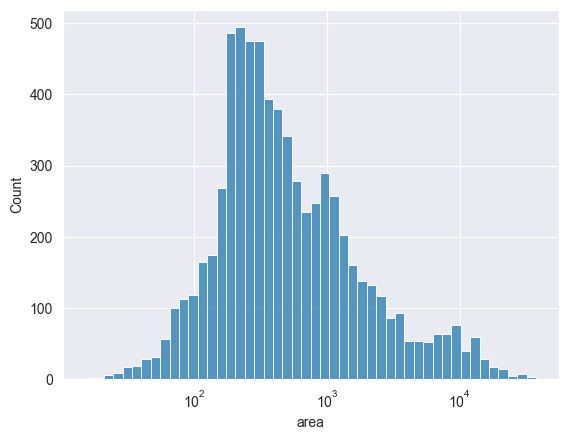

In [11]:
plt.xscale('log')
sns.histplot(ds['area'])

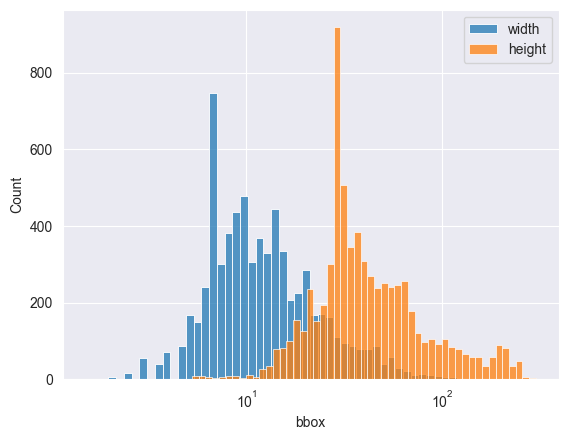

In [27]:
plt.xscale('log')
sns.histplot(ds['bbox'].apply(lambda x: x[2]))
sns.histplot(ds['bbox'].apply(lambda x: x[3]))
plt.legend(['width', 'height'])

<AxesSubplot: title={'center': 'aspect ratio'}, xlabel='bbox', ylabel='Count'>

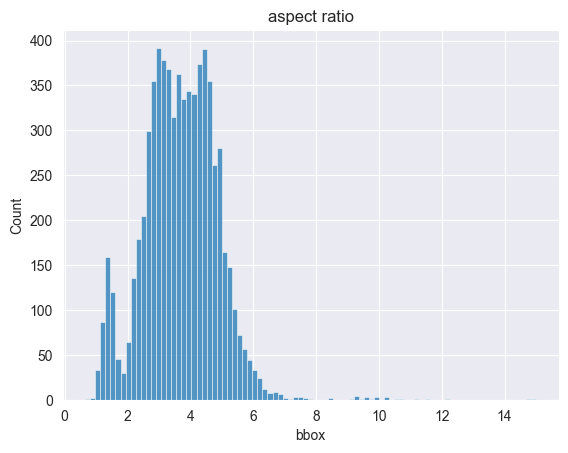

In [31]:
plt.title('aspect ratio')
sns.histplot(ds['bbox'].apply(lambda x: x[3] / x[2]))

In [4]:
model = YOLO('yolo11l.pt')
model.train(data='./datasets/valorant-3/data.yaml', epochs=8, batch=16, imgsz=416, device=0, pretrained=True, project='YOLO experiment', name='training_l')

Transferred 1009/1015 items from pretrained weights
New https://pypi.org/project/ultralytics/8.3.35 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.34  Python-3.11.1 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=./datasets/valorant-3/data.yaml, epochs=12, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=YOLO experiment, name=training_l3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos

train: Scanning E:\YandexDisk\Notebooks\test_task\datasets\valorant-3\train\labels.cache... 6927 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6927/6927 [00:00<?, ?it/s]
val: Scanning E:\YandexDisk\Notebooks\test_task\datasets\valorant-3\valid\labels.cache... 1983 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1983/1983 [00:00<?, ?it/s]


Plotting labels to YOLO experiment\training_l3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
MLflow: logging run_id(63d17280a68f40c6a2485921733aa97f) to runs\mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs\mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO experiment\training_l3
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      4.89G     0.8816      0.808     0.8774         17        416: 100%|██████████| 433/433 [01:29<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:11<00:00,  5.24it/s]

                   all       1983       2072      0.966      0.953       0.98      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12       4.9G      0.987     0.5181     0.9019         19        416: 100%|██████████| 433/433 [01:23<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:11<00:00,  5.26it/s]

                   all       1983       2072      0.965      0.937      0.978      0.691


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      4.82G      1.018     0.5085      0.899         15        416: 100%|██████████| 433/433 [01:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:11<00:00,  5.31it/s]

                   all       1983       2072      0.871      0.797      0.869      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      4.83G      1.014      0.501     0.9007         15        416: 100%|██████████| 433/433 [01:19<00:00,  5.47it/s]


MlflowException: The run 63d17280a68f40c6a2485921733aa97f must be in 'active' lifecycle_stage.

In [8]:
model.val(data='./datasets/valorant-3/data.yaml', batch=16, imgsz=416, device=0, name='evaluation')

Transferred 1009/1015 items from pretrained weights


Registered model 'yolo11l' already exists. Creating a new version of this model...
Created version '1' of model 'yolo11l'.


<ModelVersion: aliases=[], creation_timestamp=1732193661875, current_stage='None', description=None, last_updated_timestamp=1732193661875, name='yolo11l', run_id='fa057e449fcf4fc78ac220a92e6f4f48', run_link=None, source='file:///E:/YandexDisk/Notebooks/test_task/runs/mlflow/184463932476833991/fa057e449fcf4fc78ac220a92e6f4f48/artifacts', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [6]:
model.tune(iterations=20)

Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune2'
Tuner:  Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
WARNING  training failure for hyperparameter tuning iteration 1
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=./models/yolo11s.pt', 'data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml', 'epochs=100', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=./runs/de